In [ ]:
# Prepare cluster of customers to predict their purchase power based on their income and spending score.
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.cluster import KMeans
df =pd.read_csv('Mall_Customers.csv')

print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              250 non-null    int64 
 1   Gender                  250 non-null    object
 2   Age                     250 non-null    int64 
 3   Annual Income (k$)      250 non-null    int64 
 4   Spending Score (1-100)  250 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.9+ KB
None


[1673624.5, 440146.7019389438, 334892.1633221951, 262255.15471209696, 241245.06024774775, 181533.29022814965, 147303.96918645693, 133757.4010390107, 79827.9182379215, 68706.14240819568]


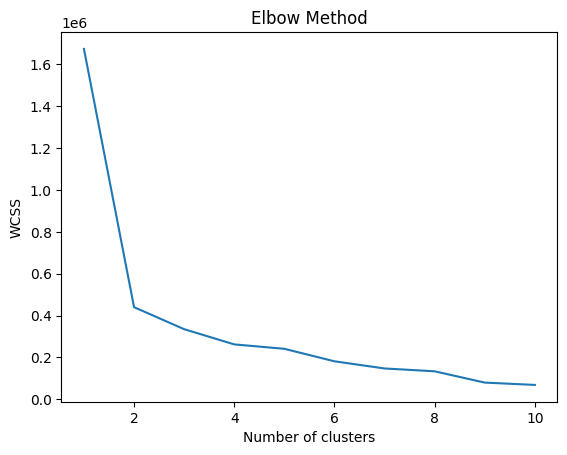

In [7]:
x=df[["Annual Income (k$)","Spending Score (1-100)"]]

wcss_list = []
for i in range(1, 11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=1)
    kmeans.fit(x)
    wcss_list.append(kmeans.inertia_)
print(wcss_list)
plt.plot(range(1, 11), wcss_list)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [8]:
model = KMeans(n_clusters=6, init='k-means++', random_state=1)
y_predict= model.fit_predict(x)

print(y_predict)

[2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 0 0 2 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0
 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5
 0 5 0 5 0 5 0 5 0 5 3 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1]


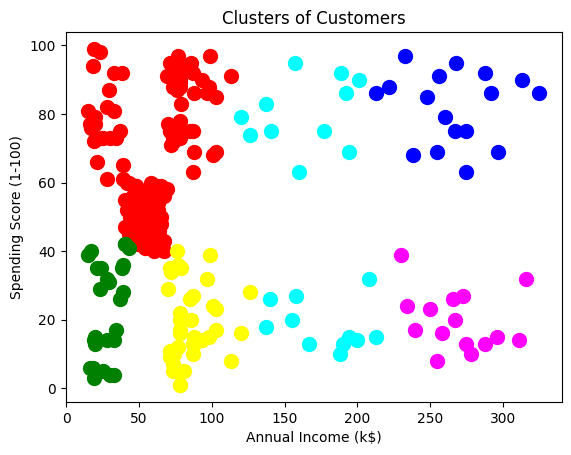

In [9]:
X_array = x.values

plt.scatter(X_array[y_predict == 0, 0], X_array[y_predict == 0, 1], s=100, color='red')
plt.scatter(X_array[y_predict == 1, 0], X_array[y_predict == 1, 1], s=100, color='blue')
plt.scatter(X_array[y_predict == 2, 0], X_array[y_predict == 2, 1], s=100, color='green')
plt.scatter(X_array[y_predict == 3, 0], X_array[y_predict == 3, 1], s=100, color='cyan')
plt.scatter(X_array[y_predict == 4, 0], X_array[y_predict == 4, 1], s=100, color='magenta')
plt.scatter(X_array[y_predict == 5, 0], X_array[y_predict == 5, 1], s=100, color='yellow')

plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [10]:
joblib.dump(model,'Model.pkl')
print("Model saved as Model.pkl")

Model saved as Model.pkl
